# Preprocessing and Analysis

## Preprocessing

In [2]:
# imports
import numpy as np
from keras.datasets import mnist
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# load in the dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# concatenating the training and test data
X_combined = np.concatenate((X_train, X_test), axis=0)  
y_combined = np.concatenate((y_train, y_test), axis=0)


In [6]:
# Flatten each image to 1D array of 784 pixels
X_flat = X_combined.reshape(X_combined.shape[0], -1)  # shape: (70000, 784)

# Convert to pandas DataFrame
X_df = pd.DataFrame(X_flat, columns=[f"pixel_{i}" for i in range(X_flat.shape[1])])

# Optionally add the label as a column
X_df['label'] = y_combined

X_df['label'] = X_df['label'].astype(str)

X_df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


## Random Forest Analysis

In [9]:
X = X_df.drop('label', axis=1)
y = X_df["label"]

# Define a pipeline with StandardScaler and a classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features 
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Print results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")

Cross-validation accuracy scores: [0.96807143 0.967      0.9665     0.96485714 0.97207143]
Mean accuracy: 0.9677


## LDA (Linear Discriminant Analysis)

In [12]:
# Define X and y correctly
X = X_df.drop('label', axis=1)
y = X_df["label"]

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LinearDiscriminantAnalysis())
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")

Cross-validation accuracy scores: [0.86471429 0.86385714 0.85771429 0.86278571 0.87814286]
Mean accuracy: 0.8654


## NN (Neural Network)

In [33]:
# Define X and y
X = X_df.drop("label", axis=1)
y = X_df["label"]

# Basic neural network (logistic regression equivalent)
def build_simple_nn():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap the model for scikit-learn pipeline
nn_classifier = KerasClassifier(model=build_simple_nn, epochs=8, batch_size=32, verbose=0)

# Pipeline with scaling and neural net
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', nn_classifier)
])

# Cross-validation (smaller cv for speed)
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")

Cross-validation accuracy scores: [0.91835714 0.91757143 0.91       0.91478571 0.92671429]
Mean accuracy: 0.9175


   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel_8  pixel_9  ...  pixel_775  pixel_776  pixel_777  pixel_778  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  label  
0          0          0          0    

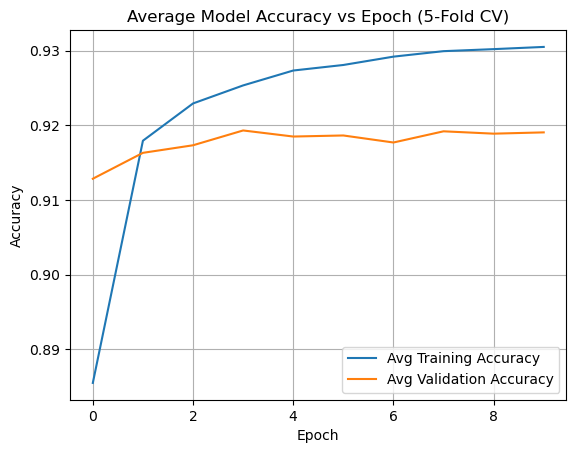

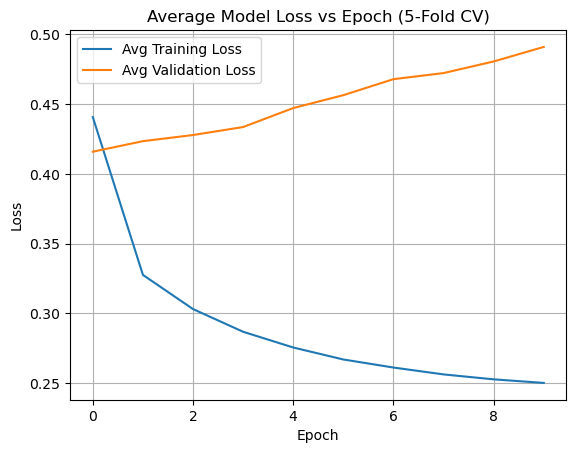

In [29]:
# imports
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist

# load in the dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# concatenating the training and test data
X_combined = np.concatenate((X_train, X_test), axis=0)  
y_combined = np.concatenate((y_train, y_test), axis=0)

# Flatten each image to 1D array of 784 pixels
X_flat = X_combined.reshape(X_combined.shape[0], -1)  # shape: (70000, 784)

# Convert to pandas DataFrame
X_df = pd.DataFrame(X_flat, columns=[f"pixel_{i}" for i in range(X_flat.shape[1])])

# Add the label as a column
X_df['label'] = y_combined

# Convert the labels back to integers (fix the issue!)
X_df['label'] = X_df['label'].astype(int)

# Now your data is ready
print(X_df.head())  # Check the first few rows of the DataFrame

# Proceed with your model and cross-validation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Set up cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
num_epochs = 10

# To store history for plotting
all_train_acc = []
all_val_acc = []
all_train_loss = []
all_val_loss = []

fold = 1
for train_index, val_index in kf.split(X_df.drop('label', axis=1), X_df['label']):
    print(f"Training fold {fold}...")
    fold += 1

    # Split the data
    X_train, X_val = X_df.drop('label', axis=1).values[train_index], X_df.drop('label', axis=1).values[val_index]
    y_train, y_val = X_df['label'].values[train_index], X_df['label'].values[val_index]

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Build the model
    def build_simple_nn():
        model = keras.Sequential([
            layers.Input(shape=(784,)),
            layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    model = build_simple_nn()
    history = model.fit(X_train_scaled, y_train,
                        validation_data=(X_val_scaled, y_val),
                        epochs=num_epochs,
                        batch_size=32,
                        verbose=0)

    # Store results
    all_train_acc.append(history.history['accuracy'])
    all_val_acc.append(history.history['val_accuracy'])
    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])

# Convert to numpy arrays for averaging
mean_train_acc = np.mean(all_train_acc, axis=0)
mean_val_acc = np.mean(all_val_acc, axis=0)
mean_train_loss = np.mean(all_train_loss, axis=0)
mean_val_loss = np.mean(all_val_loss, axis=0)

# Plot Accuracy
plt.plot(mean_train_acc, label='Avg Training Accuracy')
plt.plot(mean_val_acc, label='Avg Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Average Model Accuracy vs Epoch (5-Fold CV)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(mean_train_loss, label='Avg Training Loss')
plt.plot(mean_val_loss, label='Avg Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Model Loss vs Epoch (5-Fold CV)')
plt.legend()
plt.grid(True)
plt.show()